# ***ОБРАБОТКА ДАННЫХ***


Импортируем основные библиотеки

In [1]:
import numpy as np
import pandas as pd

Считываем данные основного теста по всем классам

In [2]:
class_8 = pd.read_csv('8 класс - test-15.csv', delimiter=',', on_bad_lines="skip", engine='python')
class_9 = pd.read_csv('9 класс test-15.csv', delimiter=',', on_bad_lines="skip", engine='python')
class_10 = pd.read_csv('10 класс test-15.csv', delimiter=',', on_bad_lines="skip", engine='python')
class_11 = pd.read_csv('11 класс test-15.csv', delimiter=',', on_bad_lines="skip", engine='python')

Файл distances был создан вручную, он включает в себя основные параметры удалённости школ до различных объектов (до зелени, до рекреационной и нерекреационной зелени, до воды, до свалок и до заводов), а также id школы, наименование школы и район. Ниже происходит считываение данных и удаление ненужных столбиков.

In [3]:
distances = pd.read_csv('distances.csv')
distances.drop(['Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11'], axis= 1 , inplace= True )
distances

,school_id,city,do_zeleni,do_recr_zeleni,do_nerecr_zeleni,do_vody,do_svalok,do_zavodov,name
0,1,Бокситогорск,"448,7880709","192,3652001","9075,287244","854,6880709","4472,997413","607,0407925","МБОУ ""Бокситогорская основная общеобразователь..."
1,2,Бокситогорск,"766,219099","232,3307989","8517,65988","369,719099","4120,798103","940,3851278","МБОУ ""Бокситогорская средняя общеобразовательн..."
2,3,NaN,"1182,488163","2891,397608","11351,47315","2408,588163","7064,544893","2222,830934","МБОУ ""Борская средняя общеобразовательная школа"""
3,4,NaN,"533,4234676","506,304487","2031,064563","1159,223468","1840,654901","1023,242078","МБОУ ""Средняя общеобразовательная школа №1"" г...."
4,5,Пикалево,"612,1324637","377,8867378","2172,896401","1071,632464","1651,126502","289,2846242","МБОУ ""Основная общеобразовательная школа №2 г...."
...,...,...,...,...,...,...,...,...,...
145,146,поселок Шугозеро,"448,0451654","430,9492602","631,6269267","880,4451654","19480,33274","2123,77206",Муниципальное общеобразовательное учреждение «...
146,147,Тосно,"697,1731926","379,058405","903,6501878","937,9731926","11148,43231","1182,156161",Муниципальное бюджетное общеобразовательное уч...
147,148,Никольское,"185,3017991","881,9319394","456,9030888","1488,701799","4264,467217","1448,67562",Муниципальное бюджетное общеобразовательное уч...
148,149,деревня Новолисино,"790,0462591","16685,55576","2653,90134","1096,146259","4845,580851","554,2737602",Муниципальное казенное общеобразовательное учр...


Оставляем только нужные для нас данные из теста - id ученика, его логин (из которого вдальнейшем получим информацию по школе) и значение показателя тревожности.

In [4]:
data8 = class_8[['id', 'login', 'STAIT']].copy()
data8 = data8[data8.STAIT > 0 ] #удаляем учеников, про которых нет необходимых данных

data9 = class_9[['id', 'login', 'STAIT']].copy()
data9 = data9[data9.STAIT > 0 ]

data10 = class_10[['id', 'login', 'STAIT']].copy()
data10 = data10[data10.STAIT > 0 ]

data11 = class_11[['id', 'login', 'STAIT']].copy()
data11 = data11[data11.STAIT > 0 ]

data9

,id,login,STAIT
7,5ded4562f59d47264e25ffee,BOKS-001-5830882089046,61.0
9,5ded4562f59d47264e25fff0,BOKS-001-5830882089048,44.0
44,5ded459ae2bc522648029214,KIRO-087-5830938545000,39.0
45,5ded459ae2bc522648029215,KIRO-087-5830938545001,42.0
46,5ded459ae2bc522648029216,KIRO-087-5830938545002,56.0
...,...,...,...
1438,5ded45a836cc3c265b88e2a5,PRIO-109-5830952432025,32.0
1439,5ded45a836cc3c265b88e2a6,PRIO-109-5830952432026,32.0
1440,5ded45a836cc3c265b88e2a7,PRIO-109-5830952432027,54.0
1441,5ded45a836cc3c265b88e2a8,PRIO-109-5830952432028,48.0


Вытаскиваем айдишники школ из логина и добавляем колонку с номером класса

In [5]:
a = data8.login.tolist()
for i in range(len(a)):
  a[i] = a[i][5:8]
data8.insert(3, "school", a)
data8.insert(3, 'class', [8]*1270)

a = data9.login.tolist()
for i in range(len(a)):
  a[i] = a[i][5:8]
data9.insert(3, "school", a)
data9.insert(3, 'class', [9]*1159)

a = data10.login.tolist()
for i in range(len(a)):
  a[i] = a[i][5:8]
data10.insert(3, "school", a)
data10.insert(3, 'class', [10]*754)

a = data11.login.tolist()
for i in range(len(a)):
  a[i] = a[i][5:8]
data11.insert(3, "school", a)
data11.insert(3, 'class', [11]*724)

data10

,id,login,STAIT,class,school
0,5ded4563a178d3264f59a0b4,BOKS-003-5830883441000,25.0,10,003
1,5ded4563a178d3264f59a0b5,BOKS-003-5830883441001,28.0,10,003
2,5ded4563a178d3264f59a0b6,BOKS-003-5830883441002,46.0,10,003
3,5ded4563a178d3264f59a0b7,BOKS-003-5830883441003,38.0,10,003
4,5ded4563a178d3264f59a0b8,BOKS-003-5830883441004,40.0,10,003
...,...,...,...,...,...
1001,5ded45a7a178d3264f59b58b,PRIO-110-5830951900005,40.0,10,110
1002,5ded45a7a178d3264f59b58c,PRIO-110-5830951900006,59.0,10,110
1003,5ded45a7a178d3264f59b58e,PRIO-110-5830951900008,36.0,10,110
1005,5ded45a7a178d3264f59b590,PRIO-110-5830951900010,45.0,10,110


Соединяем все данные по тестам в одну таблицу

In [6]:
data = data8.append(data9).append(data10).append(data11)
data

<ipython-input-6-99b3b8bef239>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data8.append(data9).append(data10).append(data11)
<ipython-input-6-99b3b8bef239>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data8.append(data9).append(data10).append(data11)
<ipython-input-6-99b3b8bef239>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data8.append(data9).append(data10).append(data11)


,id,login,STAIT,class,school
0,5ded4589e2bc522648028d5a,KING-060-5830921400000,44.0,8,060
1,5ded4589e2bc522648028d5b,KING-060-5830921400001,35.0,8,060
2,5ded4589e2bc522648028d5c,KING-060-5830921400002,49.0,8,060
3,5ded4589e2bc522648028d5d,KING-060-5830921400003,42.0,8,060
4,5ded4589e2bc522648028d5e,KING-060-5830921400004,41.0,8,060
...,...,...,...,...,...
892,5ded45a836cc3c265b88e274,PRIO-110-5830952150006,44.0,11,110
893,5ded45a836cc3c265b88e275,PRIO-110-5830952150007,51.0,11,110
894,5ded45a836cc3c265b88e276,PRIO-110-5830952150008,39.0,11,110
895,5ded45a836cc3c265b88e277,PRIO-110-5830952150009,60.0,11,110


Переводим school_id в интовый формат (целочисленный)

In [7]:
data['school'] = data['school'].astype(int)
data.rename(columns = {'school':'school_id'}, inplace = True )
data

,id,login,STAIT,class,school_id
0,5ded4589e2bc522648028d5a,KING-060-5830921400000,44.0,8,60
1,5ded4589e2bc522648028d5b,KING-060-5830921400001,35.0,8,60
2,5ded4589e2bc522648028d5c,KING-060-5830921400002,49.0,8,60
3,5ded4589e2bc522648028d5d,KING-060-5830921400003,42.0,8,60
4,5ded4589e2bc522648028d5e,KING-060-5830921400004,41.0,8,60
...,...,...,...,...,...
892,5ded45a836cc3c265b88e274,PRIO-110-5830952150006,44.0,11,110
893,5ded45a836cc3c265b88e275,PRIO-110-5830952150007,51.0,11,110
894,5ded45a836cc3c265b88e276,PRIO-110-5830952150008,39.0,11,110
895,5ded45a836cc3c265b88e277,PRIO-110-5830952150009,60.0,11,110


Соединяем таблицы с тестом и с расстояниями до объектов по school_id, предобработка данных, проведённая выше, позволяет нам это сделать. Теперь таблица result хранит все нужные данные в удобном формате.

In [8]:
result = pd.merge(data, distances, on="school_id")
result

,id,login,STAIT,class,school_id,city,do_zeleni,do_recr_zeleni,do_nerecr_zeleni,do_vody,do_svalok,do_zavodov,name
0,5ded4589e2bc522648028d5a,KING-060-5830921400000,44.0,8,60,Ивангород,"563,9915241","170,5114286","483,2234914","941,1915241","9221,089682","690,6394084","МБОУ ""Ивангородская средняя общеобразовательна..."
1,5ded4589e2bc522648028d5b,KING-060-5830921400001,35.0,8,60,Ивангород,"563,9915241","170,5114286","483,2234914","941,1915241","9221,089682","690,6394084","МБОУ ""Ивангородская средняя общеобразовательна..."
2,5ded4589e2bc522648028d5c,KING-060-5830921400002,49.0,8,60,Ивангород,"563,9915241","170,5114286","483,2234914","941,1915241","9221,089682","690,6394084","МБОУ ""Ивангородская средняя общеобразовательна..."
3,5ded4589e2bc522648028d5d,KING-060-5830921400003,42.0,8,60,Ивангород,"563,9915241","170,5114286","483,2234914","941,1915241","9221,089682","690,6394084","МБОУ ""Ивангородская средняя общеобразовательна..."
4,5ded4589e2bc522648028d5e,KING-060-5830921400004,41.0,8,60,Ивангород,"563,9915241","170,5114286","483,2234914","941,1915241","9221,089682","690,6394084","МБОУ ""Ивангородская средняя общеобразовательна..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3902,5ded45b7e2bc522648029a94,TIKH-134-5830967159026,36.0,11,134,NaN,"346,9392425","349,7224426","3984,930107","816,3392425","7093,64416","497,4788785",Муниципальное общеобразовательное учреждение «...
3903,5ded45b7e2bc522648029a96,TIKH-134-5830967159028,40.0,11,134,NaN,"346,9392425","349,7224426","3984,930107","816,3392425","7093,64416","497,4788785",Муниципальное общеобразовательное учреждение «...
3904,5ded45ae36cc3c265b88e4f8,SLAN-121-5830958838000,51.0,11,121,деревня Старополье,"585,5340353","10505,10328","3866,892715","563,4340353","21566,67019","449,772208","Муниципальное общеобразовательное учреждение ""..."
3905,5ded45ae36cc3c265b88e4f9,SLAN-121-5830958838001,58.0,11,121,деревня Старополье,"585,5340353","10505,10328","3866,892715","563,4340353","21566,67019","449,772208","Муниципальное общеобразовательное учреждение ""..."


Удаляем строчки в которых есть пропущенные данные

In [9]:
result = result[result['do_zeleni'].notna()]
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3777 entries, 0 to 3906
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                3777 non-null   object 
 1   login             3777 non-null   object 
 2   STAIT             3777 non-null   float64
 3   class             3777 non-null   int64  
 4   school_id         3777 non-null   int64  
 5   city              2584 non-null   object 
 6   do_zeleni         3777 non-null   object 
 7   do_recr_zeleni    3777 non-null   object 
 8   do_nerecr_zeleni  3777 non-null   object 
 9   do_vody           3777 non-null   object 
 10  do_svalok         3777 non-null   object 
 11  do_zavodov        3777 non-null   object 
 12  name              3777 non-null   object 
dtypes: float64(1), int64(2), object(10)
memory usage: 413.1+ KB


In [10]:
result

,id,login,STAIT,class,school_id,city,do_zeleni,do_recr_zeleni,do_nerecr_zeleni,do_vody,do_svalok,do_zavodov,name
0,5ded4589e2bc522648028d5a,KING-060-5830921400000,44.0,8,60,Ивангород,"563,9915241","170,5114286","483,2234914","941,1915241","9221,089682","690,6394084","МБОУ ""Ивангородская средняя общеобразовательна..."
1,5ded4589e2bc522648028d5b,KING-060-5830921400001,35.0,8,60,Ивангород,"563,9915241","170,5114286","483,2234914","941,1915241","9221,089682","690,6394084","МБОУ ""Ивангородская средняя общеобразовательна..."
2,5ded4589e2bc522648028d5c,KING-060-5830921400002,49.0,8,60,Ивангород,"563,9915241","170,5114286","483,2234914","941,1915241","9221,089682","690,6394084","МБОУ ""Ивангородская средняя общеобразовательна..."
3,5ded4589e2bc522648028d5d,KING-060-5830921400003,42.0,8,60,Ивангород,"563,9915241","170,5114286","483,2234914","941,1915241","9221,089682","690,6394084","МБОУ ""Ивангородская средняя общеобразовательна..."
4,5ded4589e2bc522648028d5e,KING-060-5830921400004,41.0,8,60,Ивангород,"563,9915241","170,5114286","483,2234914","941,1915241","9221,089682","690,6394084","МБОУ ""Ивангородская средняя общеобразовательна..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3902,5ded45b7e2bc522648029a94,TIKH-134-5830967159026,36.0,11,134,NaN,"346,9392425","349,7224426","3984,930107","816,3392425","7093,64416","497,4788785",Муниципальное общеобразовательное учреждение «...
3903,5ded45b7e2bc522648029a96,TIKH-134-5830967159028,40.0,11,134,NaN,"346,9392425","349,7224426","3984,930107","816,3392425","7093,64416","497,4788785",Муниципальное общеобразовательное учреждение «...
3904,5ded45ae36cc3c265b88e4f8,SLAN-121-5830958838000,51.0,11,121,деревня Старополье,"585,5340353","10505,10328","3866,892715","563,4340353","21566,67019","449,772208","Муниципальное общеобразовательное учреждение ""..."
3905,5ded45ae36cc3c265b88e4f9,SLAN-121-5830958838001,58.0,11,121,деревня Старополье,"585,5340353","10505,10328","3866,892715","563,4340353","21566,67019","449,772208","Муниципальное общеобразовательное учреждение ""..."


# Средний уровень тревожности по школам и по классам

In [11]:
print(f"Средний показатель тревожности по всем 8 классам: {np.mean(class_8['STAIT'])}")
print(f"Средний показатель тревожности по всем 9 классам: {np.mean(class_9['STAIT'])}")
print(f"Средний показатель тревожности по всем 10 классам: {np.mean(class_10['STAIT'])}")
print(f"Средний показатель тревожности по всем 11 классам: {np.mean(class_11['STAIT'])}")

Средний показатель тревожности по всем 8 классам: 44.060629921259846
Средний показатель тревожности по всем 9 классам: 44.265746333045726
Средний показатель тревожности по всем 10 классам: 43.8289124668435
Средний показатель тревожности по всем 11 классам: 43.73618784530387


In [12]:
result.groupby(['name']).agg({'STAIT': ['mean']}).reset_index() #средние показатели тревожности для каждой школы

,name,STAIT
,,mean
0,"МБОУ ""Бокситогорская основная общеобразователь...",52.500000
1,"МБОУ ""Борская средняя общеобразовательная школа""",38.941176
2,"МБОУ ""Ивангородская средняя общеобразовательна...",41.916667
3,"МБОУ ""Кингисеппская гимназия""",41.071429
4,"МБОУ ""Кировская гимназия им.Героя Советского С...",49.238095
...,...,...
90,Муниципальное общеобразовательное учреждение «...,44.692308
91,"Муниципальное общеобразовтаельное учреждение ""...",43.628571
92,"Муниципальное общеобразовтаельное учреждение ""...",43.324324


<Axes: xlabel='class', ylabel='STAIT'>

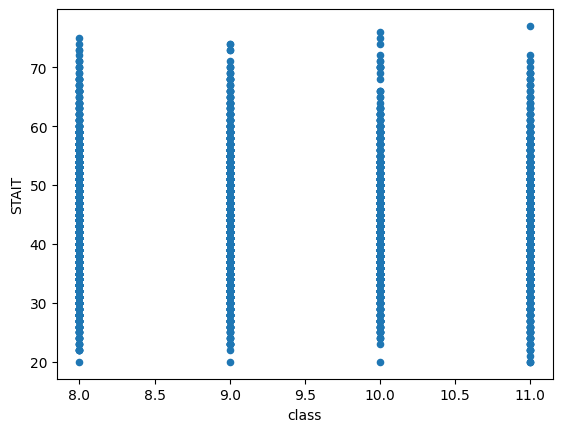

In [13]:
result.plot(x="class", y="STAIT", kind="scatter")

# **РАСЧЁТ ПРЕ-ТЕСТА**

In [14]:
pretest_8 = pd.read_csv('pre -test-8.csv', delimiter=',', on_bad_lines="skip", engine='python')
pretest_9 = pd.read_csv('pre - test-9.csv', delimiter=',', on_bad_lines="skip", engine='python')
pretest_10 = pd.read_csv('pre - test-10.csv', delimiter=',', on_bad_lines="skip", engine='python')
pretest_11 = pd.read_csv('pre - test-11.csv', delimiter=',', on_bad_lines="skip", engine='python')
pretest_8

,subject['id'],subject['login'],subject['alias'],subject['createdAt'],subject['updatedAt'],test[11].question['STATE1'].response.value,test[11].question['STATE1'].response.orderNumber,test[11].question['STATE1'].firstQuestionDisplayTime,test[11].question['STATE1'].lastQuestionDisplayTime,test[11].question['STATE1'].firstResponseTime,...,test[11].question['STATE3'].lastQuestionDisplayTime,test[11].question['STATE3'].firstResponseTime,test[11].question['STATE3'].lastResponseTime,test[11].question['STATE3'].response.totalTime,test[11].question['STATE4'].response.value,test[11].question['STATE4'].response.orderNumber,test[11].question['STATE4'].firstQuestionDisplayTime,test[11].question['STATE4'].lastQuestionDisplayTime,test[11].question['STATE4'].firstResponseTime,test[11].question['STATE4'].lastResponseTime
0,id,login,alias,createdAt,updatedAt,STATE1,STATE1.orderNumber,STATE1.firstQuestionDisplayTime,STATE1.lastQuestionDisplayTime,STATE1.firstResponseTime,...,STATE3.lastQuestionDisplayTime,STATE3.firstResponseTime,STATE3.lastResponseTime,STATE3.totalTime,STATE4,STATE4.orderNumber,STATE4.firstQuestionDisplayTime,STATE4.lastQuestionDisplayTime,STATE4.firstResponseTime,STATE4.lastResponseTime
1,5fbe5d5bb9d6bb8cb01eb62b,BOKS-009-6311259681004,BOKS-009-8-025,25.11.2020 16:34:19.685,07.12.2020 21:26:53.088,1,1,30.11.2020 18:24:44.556,30.11.2020 18:24:44.556,30.11.2020 18:24:49.403,...,30.11.2020 18:24:44.575,30.11.2020 18:25:15.323,30.11.2020 18:25:15.323,30.748,1,1,30.11.2020 18:24:44.582,30.11.2020 18:24:44.582,30.11.2020 18:25:19.036,30.11.2020 18:25:19.036
2,5fbf8aa6d2545a64c8d41ef2,BOKS-009-6388390235000,BOKS-009-8-026,26.11.2020 13:59:50.239,04.12.2020 11:06:41.129,3,3,04.12.2020 11:02:43.368,04.12.2020 11:02:43.368,04.12.2020 11:02:51.077,...,04.12.2020 11:02:43.420,04.12.2020 11:03:06.357,04.12.2020 11:03:06.357,22.937,1,1,04.12.2020 11:02:43.442,04.12.2020 11:02:43.442,04.12.2020 11:03:08.423,04.12.2020 11:03:08.423
3,5fbf8aa6d2545a64c8d41ef3,BOKS-009-6388390235001,BOKS-009-8-027,26.11.2020 13:59:50.239,07.12.2020 13:46:46.411,2,2,07.12.2020 13:42:41.635,07.12.2020 13:42:41.635,07.12.2020 13:43:00.765,...,07.12.2020 13:42:41.650,07.12.2020 13:43:04.251,07.12.2020 13:43:04.251,22.601,1,1,07.12.2020 13:42:41.652,07.12.2020 13:42:41.652,07.12.2020 13:43:06.891,07.12.2020 13:43:06.891
4,5fbf8aa6d2545a64c8d41ef4,BOKS-009-6388390235002,BOKS-009-8-028,26.11.2020 13:59:50.240,07.12.2020 14:00:58.621,3,3,07.12.2020 13:57:07.554,07.12.2020 13:57:07.554,07.12.2020 13:57:13.265,...,07.12.2020 13:57:07.572,07.12.2020 13:57:21.169,07.12.2020 13:57:22.406,14.834,1,1,07.12.2020 13:57:07.579,07.12.2020 13:57:07.579,07.12.2020 13:57:23.539,07.12.2020 13:57:23.539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,5ded45bf36cc3c265b88ec5e,TIKH-146-5830975758014,TIKH-146-8-014,08.12.2019 21:49:35.767,25.11.2020 09:10:18.969,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1456,5ded45bf36cc3c265b88ec5f,TIKH-146-5830975758015,TIKH-146-8-015,08.12.2019 21:49:35.767,25.11.2020 09:05:39.598,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1457,5ded45c2f59d47264e26114b,TOSN-150-5830978276001,TOSN-150-8-001,08.12.2019 21:49:38.288,28.12.2019 12:51:21.848,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1458,5ded45c2f59d47264e26114c,TOSN-150-5830978276002,TOSN-150-8-002,08.12.2019 21:49:38.288,28.12.2019 13:08:05.480,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Производим предобработку данных пре-теста. Приводим числовые значения к интовому виду, удаляем пустые строки и соединяем все данные в одну таблицу.

In [15]:
pretest_8 = pretest_8.drop(labels = [0],axis = 0)
pretest_8 = pretest_8[pretest_8["test[11].question['STATE1'].response.value"].notna()]
pretest_8["pre_STAIT"] =  pretest_8["test[11].question['STATE1'].response.value"].astype(int) + pretest_8["test[11].question['STATE2'].response.value"].astype(int) + pretest_8["test[11].question['STATE3'].response.value"].astype(int) + pretest_8["test[11].question['STATE4'].response.value"].astype(int)

pretest_9 = pretest_9.drop(labels = [0],axis = 0)
pretest_9 = pretest_9[pretest_9["test[11].question['STATE1'].response.value"].notna()]
pretest_9["pre_STAIT"] =  pretest_9["test[11].question['STATE1'].response.value"].astype(int) + pretest_9["test[11].question['STATE2'].response.value"].astype(int) + pretest_9["test[11].question['STATE3'].response.value"].astype(int) + pretest_9["test[11].question['STATE4'].response.value"].astype(int)

pretest_10 = pretest_10.drop(labels = [0],axis = 0)
pretest_10 = pretest_10[pretest_10["test[11].question['STATE1'].response.value"].notna()]
pretest_10["pre_STAIT"] =  pretest_10["test[11].question['STATE1'].response.value"].astype(int) + pretest_10["test[11].question['STATE2'].response.value"].astype(int) + pretest_10["test[11].question['STATE3'].response.value"].astype(int) + pretest_10["test[11].question['STATE4'].response.value"].astype(int)

pretest_11 = pretest_11.drop(labels = [0],axis = 0)
pretest_11 = pretest_11[pretest_11["test[11].question['STATE1'].response.value"].notna()]
pretest_11 = pretest_11[pretest_11["test[11].question['STATE2'].response.value"].notna()]
pretest_11["pre_STAIT"] =  pretest_11["test[11].question['STATE1'].response.value"].astype(int) + pretest_11["test[11].question['STATE2'].response.value"].astype(int) + pretest_11["test[11].question['STATE3'].response.value"].astype(int) + pretest_11["test[11].question['STATE4'].response.value"].astype(int)

In [16]:
pretest_8 = pretest_8[["subject['id']", 'pre_STAIT']].copy()
pretest_9 = pretest_9[["subject['id']", 'pre_STAIT']].copy()
pretest_10 = pretest_10[["subject['id']", 'pre_STAIT']].copy()
pretest_11 = pretest_11[["subject['id']", 'pre_STAIT']].copy()
pretest = pretest_8.append(pretest_9).append(pretest_10).append(pretest_11)
pretest

<ipython-input-16-a3e8cc22022d>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pretest = pretest_8.append(pretest_9).append(pretest_10).append(pretest_11)
<ipython-input-16-a3e8cc22022d>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pretest = pretest_8.append(pretest_9).append(pretest_10).append(pretest_11)
<ipython-input-16-a3e8cc22022d>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pretest = pretest_8.append(pretest_9).append(pretest_10).append(pretest_11)


,subject['id'],pre_STAIT
1,5fbe5d5bb9d6bb8cb01eb62b,5
2,5fbf8aa6d2545a64c8d41ef2,6
3,5fbf8aa6d2545a64c8d41ef3,5
4,5fbf8aa6d2545a64c8d41ef4,8
5,5fbf8aa6d2545a64c8d41ef6,6
...,...,...
830,5ded45ba36cc3c265b88eb51,6
831,5ded45ba36cc3c265b88eb52,7
832,5ded45ba36cc3c265b88eb53,4
833,5ded45ba36cc3c265b88eb54,4


Соедииняем таблицу result со значениемя пре-теста по колонке id. Таблица result1 теперь хранит информацию и про пре-тест

In [17]:
pretest.rename(columns = {"subject['id']":'id'}, inplace = True )
result1 = pd.merge(result, pretest, on="id")
result1 = result1.drop(['city'], axis=1)
result1

,id,login,STAIT,class,school_id,do_zeleni,do_recr_zeleni,do_nerecr_zeleni,do_vody,do_svalok,do_zavodov,name,pre_STAIT
0,5ded4589e2bc522648028d5b,KING-060-5830921400001,35.0,8,60,"563,9915241","170,5114286","483,2234914","941,1915241","9221,089682","690,6394084","МБОУ ""Ивангородская средняя общеобразовательна...",4
1,5ded4589e2bc522648028d5c,KING-060-5830921400002,49.0,8,60,"563,9915241","170,5114286","483,2234914","941,1915241","9221,089682","690,6394084","МБОУ ""Ивангородская средняя общеобразовательна...",5
2,5ded4589e2bc522648028d5d,KING-060-5830921400003,42.0,8,60,"563,9915241","170,5114286","483,2234914","941,1915241","9221,089682","690,6394084","МБОУ ""Ивангородская средняя общеобразовательна...",5
3,5ded4589e2bc522648028d5e,KING-060-5830921400004,41.0,8,60,"563,9915241","170,5114286","483,2234914","941,1915241","9221,089682","690,6394084","МБОУ ""Ивангородская средняя общеобразовательна...",6
4,5ded4589e2bc522648028d5f,KING-060-5830921400005,27.0,8,60,"563,9915241","170,5114286","483,2234914","941,1915241","9221,089682","690,6394084","МБОУ ""Ивангородская средняя общеобразовательна...",6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3605,5ded45b7e2bc522648029a87,TIKH-134-5830967159013,57.0,11,134,"346,9392425","349,7224426","3984,930107","816,3392425","7093,64416","497,4788785",Муниципальное общеобразовательное учреждение «...,6
3606,5ded45b7e2bc522648029a94,TIKH-134-5830967159026,36.0,11,134,"346,9392425","349,7224426","3984,930107","816,3392425","7093,64416","497,4788785",Муниципальное общеобразовательное учреждение «...,5
3607,5ded45b7e2bc522648029a96,TIKH-134-5830967159028,40.0,11,134,"346,9392425","349,7224426","3984,930107","816,3392425","7093,64416","497,4788785",Муниципальное общеобразовательное учреждение «...,6
3608,5ded45ae36cc3c265b88e4f9,SLAN-121-5830958838001,58.0,11,121,"585,5340353","10505,10328","3866,892715","563,4340353","21566,67019","449,772208","Муниципальное общеобразовательное учреждение ""...",6


Считаем корреляцию между уровнем тревожности школьника и его разультатами пре-теста.

In [18]:
result1['STAIT'].corr(result1['pre_STAIT'])

0.35053775451637254

<Axes: xlabel='STAIT', ylabel='pre_STAIT'>

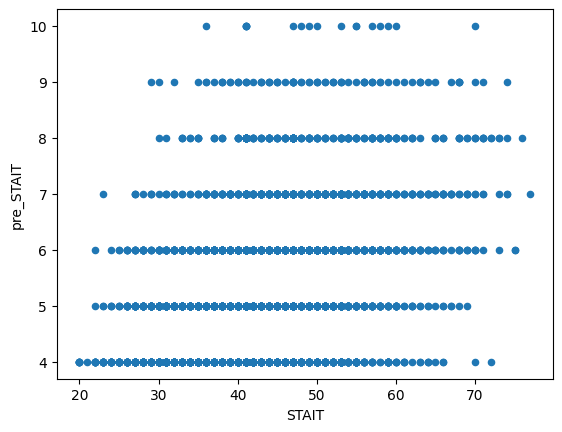

In [19]:
result1.plot(x="STAIT", y="pre_STAIT", kind="scatter")

И по значению корреляции и по графику можем сделать вывод, что корреляция между уровнем тревожности и показателем пре-теста (а именно совокупность чувства комфорта, сытости и бодрости) достаточно значительная.

In [20]:
result1['do_zeleni'] = (result1['do_zeleni'].str.split()).apply(lambda x: float(x[0].replace(',', '')))
result1['STAIT'].corr(result1['do_zeleni'])

-0.031615065039726956

In [21]:
result1['do_svalok'] = (result1['do_svalok'].str.split()).apply(lambda x: float(x[0].replace(',', '')))
result1['STAIT'].corr(result1['do_svalok'])

-0.039544526915662015

In [22]:
result1['do_zavodov'] = (result1['do_zavodov'].str.split()).apply(lambda x: float(x[0].replace(',', '')))
result1['STAIT'].corr(result1['do_zavodov'])

-0.011706539044542066

А вот звисимость тревожности от отдельных значений удаленности до определённых объектов не была обнаружена. Но в дальнейшем с помощью моделей машинного обучения и совокупности всех факторов, которые в неё будут учитываться, мы сможем с неплохой точностью прогнозировать показатели тревожности у школьников.

# ***ЛИНЕЙНАЯ РЕГРЕССИЯ***

Переводим все числовые данные в формат float и применяем линейную регрессию, за метрику берём среднюю квадратичную ошибку и среднюю абсолютную (вторая яеляется более показательной для нашего вопроса).
Про LinearRegression читать здесь - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [23]:
result1['do_recr_zeleni'] = (result1['do_recr_zeleni'].str.split()).apply(lambda x: float(x[0].replace(',', '')))
result1['do_nerecr_zeleni'] = (result1['do_nerecr_zeleni'].str.split()).apply(lambda x: float(x[0].replace(',', '')))
result1['do_vody'] = (result1['do_vody'].str.split()).apply(lambda x: float(x[0].replace(',', '')))

In [24]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

y = result1["STAIT"]
X = result1.drop(['STAIT', "id", "login", "name"], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
model = LinearRegression()
model.fit(X_train, y_train)
print('MSE score: {}'.format(mean_squared_error(model.predict(X_test), y_test)))
print('MAE score: {}'.format(mean_absolute_error(model.predict(X_test), y_test)))

MSE score: 92.97979345238355
MAE score: 7.969084929577211


Средняя абсолютная ошибка (MAE) равна 8. Учитывая, что разброс тревожности от 20 до 80, это не самый плохой результат, но от моделей машинного обучения скорее всего получится добиться немного большего.

# ***МАШИННОЕ ОБУЧЕНИЕ***


Были использованы несколько моделей машинного обучения, ссылки на ознакомление с которыми можно найти ниже:
RandomForestRegressor - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
GradientBoostingRegressor - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html
LogisticRegression - https://scikit-learn.org/stable/modules/linear_model.html

DecisionTreeRegressor - https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

In [25]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor

model = LogisticRegression(random_state=13)
model.fit(X_train, y_train)
print(f'MAE для Logistic Regression: {mean_absolute_error(model.predict(X_test), y_test)}')

model = RandomForestRegressor(random_state=13)
model.fit(X_train, y_train)
print(f'MAE для Random Forest: {mean_absolute_error(model.predict(X_test), y_test)}')

model = DecisionTreeRegressor(random_state=14)
model.fit(X_train, y_train)
print(f'MAE для Decision Tree: {mean_absolute_error(model.predict(X_test), y_test)}')

model = GradientBoostingRegressor(random_state=14)
model.fit(X_train, y_train)
print(f'MAE для Gradient Boosting: {mean_absolute_error(model.predict(X_test), y_test)}')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


MAE для Logistic Regression: 8.77746999076639
MAE для Random Forest: 8.176270879749335
MAE для Decision Tree: 8.589950635806447
MAE для Gradient Boosting: 7.741077579228116


XGBRegressor - https://www.datatechnotes.com/2019/06/regression-example-with-xgbregressor-in.html

GridSearchCV (метод для поиска лучших гиперпараметров) - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [26]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

params = {
        'max_depth': [3, 4, 5, 6],
        'n_estimators': [3, 5, 10, 15, 20, 50, 75],
        'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
        }

model = XGBRegressor(random_state=14)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
xgb = GridSearchCV(model, params, verbose = 1 , n_jobs=-1, cv=kfold)
xgb.fit(X_train, y_train)
print(f'Лучшие гиперпараметры: {xgb.best_params_}')
print(f'MAE XGBRegressor с лучшими гиперпараметрами: {mean_absolute_error(xgb.predict(X_test), y_test)}')

Fitting 5 folds for each of 168 candidates, totalling 840 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Лучшие гиперпараметры: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
MAE XGBRegressor с лучшими гиперпараметрами: 7.715731936918842


BaggingRegressor - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html

In [27]:
from sklearn.ensemble import BaggingRegressor

base_tree = DecisionTreeRegressor(random_state=123)
model = BaggingRegressor(base_tree, n_estimators=25, random_state=13)
model.fit(X_train, y_train)
print(f'MAE для ансамбля деревьев: {mean_absolute_error(y_test, model.predict(X_test))}')

MAE для ансамбля деревьев: 8.23078169090744


In [28]:
model = BaggingRegressor(GradientBoostingRegressor(max_depth=3, learning_rate=0.1, random_state=14, n_estimators=50), n_estimators=25, random_state=13)
model.fit(X_train, y_train)
print(f'MAE для бэггинга над градиентным бустингом: {mean_absolute_error(model.predict(X_test), y_test)}')

MAE для бэггинга над градиентным бустингом: 7.697863351982551


Вывод: лучший результат у бэггинга над бустингом с большим количеством деревьев, что в принципе логично, потому что данная архитектура модели действительно эффективная, потому что не склонна к перобучению и слишком мощная, чтобы недообучаться. MAE = 7.7 в данном случае не особенно точный результат, это подтверждает вывод о том, что между тревожностью и зеленью в округе школ нет сильной корреляции

# ***ДЕМОГРАФИЯ ПО ШКОЛЬНИКАМ***

In [39]:
dem_8 = pd.read_csv('8 класс - демография test-2.csv', delimiter=',', on_bad_lines="skip", engine='python')
dem_9 = pd.read_csv('9 класс - демография test-2.csv', delimiter=',', on_bad_lines="skip", engine='python')
dem_10 = pd.read_csv('10 класс - демография test-2.csv', delimiter=',', on_bad_lines="skip", engine='python')
dem_11 = pd.read_csv('11 класс - демография test-2.csv', delimiter=',', on_bad_lines="skip", engine='python')
dem_9

,id,login,alias,createdAt,updatedAt,Age,Age.orderNumber,Age.firstQuestionDisplayTime,Age.lastQuestionDisplayTime,Age.firstResponseTime,...,LangMain3Input.lastQuestionDisplayTime,LangMain3Input.firstResponseTime,LangMain3Input.lastResponseTime,LangMain3Input.totalTime,metadata.platformOs,metadata.userAgent,metadata.platformDescription,metadata.startTime,metadata.endTime,metadata.totalTime
0,5ded4562f59d47264e25ffc1,BOKS-001-5830882089001,BOKS-001-9-001,08.12.2019 21:48:02.107,23.12.2019 09:49:28.408,15.0,11.0,23.12.2019 10:00:45.347,23.12.2019 10:00:45.347,23.12.2019 10:00:50.835,...,23.12.2019 10:00:45.697,NaN,NaN,NaN,Windows Server 2008 R2 / 7 64-bit,Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:71...,Firefox 71.0 on Windows Server 2008 R2 / 7 64-bit,23.12.2019 10:00:43.262,23.12.2019 10:01:27.364,44.102
1,5ded4562f59d47264e25ffc2,BOKS-001-5830882089002,BOKS-001-9-002,08.12.2019 21:48:02.108,23.12.2019 09:32:26.920,15.0,11.0,23.12.2019 09:47:30.467,23.12.2019 09:47:30.467,23.12.2019 09:47:42.501,...,23.12.2019 09:47:31.115,NaN,NaN,NaN,Windows Server 2008 R2 / 7 64-bit,Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:71...,Firefox 71.0 on Windows Server 2008 R2 / 7 64-bit,23.12.2019 09:47:27.506,23.12.2019 09:48:46.581,79.075
2,5ded4562f59d47264e25ffc5,BOKS-001-5830882089005,BOKS-001-9-005,08.12.2019 21:48:02.108,23.12.2019 09:52:22.678,15.0,11.0,23.12.2019 09:55:08.825,23.12.2019 09:55:08.825,23.12.2019 09:55:41.532,...,23.12.2019 09:55:09.410,NaN,NaN,NaN,Windows Server 2008 R2 / 7 64-bit,Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:71...,Firefox 71.0 on Windows Server 2008 R2 / 7 64-bit,23.12.2019 09:54:52.734,23.12.2019 09:57:17.055,144.321
3,5ded4562f59d47264e25ffea,BOKS-001-5830882089042,BOKS-001-9-042,08.12.2019 21:48:02.114,31.01.2020 20:39:49.040,15.0,11.0,23.12.2019 09:59:42.613,23.12.2019 09:59:42.613,23.12.2019 09:59:54.979,...,23.12.2019 09:59:43.258,NaN,NaN,NaN,Windows Server 2008 R2 / 7 64-bit,Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:71...,Firefox 71.0 on Windows Server 2008 R2 / 7 64-bit,23.12.2019 09:59:39.415,23.12.2019 10:01:31.598,112.183
4,5ded4562f59d47264e25ffeb,BOKS-001-5830882089043,BOKS-001-9-043,08.12.2019 21:48:02.114,31.01.2020 20:21:12.312,15.0,11.0,31.01.2020 20:24:12.542,31.01.2020 20:24:12.542,31.01.2020 20:25:46.325,...,31.01.2020 20:24:12.679,31.01.2020 20:24:57.247,31.01.2020 20:25:14.283,61.604,Android 9,Mozilla/5.0 (Linux; Android 9; Redmi 7) AppleW...,Chrome Mobile 79.0.3945.93 on Android 9,31.01.2020 20:24:11.104,31.01.2020 20:26:02.943,111.839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,5ded45a836cc3c265b88e2a5,PRIO-109-5830952432025,PRIO-109-9-025,08.12.2019 21:49:12.447,28.02.2020 10:37:21.243,15.0,11.0,27.12.2019 10:51:17.841,27.12.2019 10:51:17.841,27.12.2019 10:52:30.957,...,27.12.2019 10:51:17.989,NaN,NaN,NaN,Windows 10 64-bit,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Chrome 79.0.3945.88 on Windows 10 64-bit,27.12.2019 10:51:15.587,27.12.2019 10:52:41.578,85.991
1439,5ded45a836cc3c265b88e2a6,PRIO-109-5830952432026,PRIO-109-9-026,08.12.2019 21:49:12.447,28.02.2020 10:40:02.508,16.0,12.0,27.12.2019 10:44:54.367,27.12.2019 10:44:54.367,27.12.2019 10:45:04.682,...,27.12.2019 10:44:54.431,NaN,NaN,NaN,Windows 10 64-bit,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Chrome 79.0.3945.88 on Windows 10 64-bit,27.12.2019 10:44:51.446,27.12.2019 10:46:18.312,86.866
1440,5ded45a836cc3c265b88e2a7,PRIO-109-5830952432027,PRIO-109-9-027,08.12.2019 21:49:12.447,28.02.2020 10:38:36.452,15.0,11.0,27.12.2019 10:44:46.884,27.12.2019 10:44:46.884,27.12.2019 10:44:55.825,...,27.12.2019 10:44:46.958,NaN,NaN,NaN,Windows 10 64-bit,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Chrome 79.0.3945.88 on Windows 10 64-bit,27.12.2019 10:44:40.206,27.12.2019 10:46:09.130,88.924
1441,5ded45a836cc3c265b88e2a8,PRIO-109-5830952432028,PRIO-109-9-028,08.12.2019 21:49:12.447,28.02.2020 10:38:09.169,15.0,11.0,27.12.2019 10:45:30.581,27.12.2019 10:45:30.581,27.12.201

Сооединяем данные по демографии в одну таблицу и оставляем только столбики с айди, возрастом, полом и ведущей рукой

In [53]:
dem = dem_8.append(dem_9).append(dem_10).append(dem_11)
dem1 = dem[['id', 'Age',  'LeadingHand']].copy()
dem = dem[['id', 'Age', 'Sex']].copy()
dem

<ipython-input-53-d9331c98e4b8>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dem = dem_8.append(dem_9).append(dem_10).append(dem_11)
<ipython-input-53-d9331c98e4b8>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dem = dem_8.append(dem_9).append(dem_10).append(dem_11)


,id,Age,Sex
0,5ded4589e2bc522648028d5a,14.0,1.0
1,5ded4589e2bc522648028d5b,14.0,2.0
2,5ded4589e2bc522648028d5c,14.0,2.0
3,5ded4589e2bc522648028d5d,14.0,1.0
4,5ded4589e2bc522648028d5e,14.0,1.0
...,...,...,...
892,5ded45a836cc3c265b88e274,17.0,1.0
893,5ded45a836cc3c265b88e275,17.0,1.0
894,5ded45a836cc3c265b88e276,17.0,1.0
895,5ded45a836cc3c265b88e277,17.0,2.0


Строим круговую диаграмму распределения по полу, возрасту и ведущей руке, используя groupby




<ipython-input-50-8d6de1112252>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dem.groupby(['Sex']).sum().plot(kind='pie', subplots=True, title='Распределение по полу', autopct='%1.0f%%', ylabel='', labeldistance=None, labels = [r'Мужчины', r'Женщины',


array([<Axes: >], dtype=object)

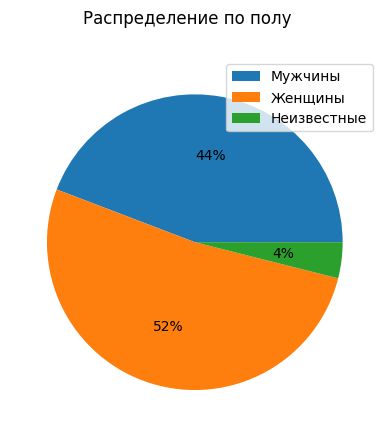

In [50]:
dem.groupby(['Sex']).sum().plot(kind='pie', subplots=True, title='Распределение по полу', autopct='%1.0f%%', ylabel='', labeldistance=None, labels = [r'Мужчины', r'Женщины',
r'Неизвестные'])

<ipython-input-51-223960db9b80>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dem.groupby(['Age']).sum().plot(kind='pie', subplots=True, title='Распределение по возрасту', autopct='%1.0f%%', ylabel='', labeldistance=None)


array([<Axes: >], dtype=object)

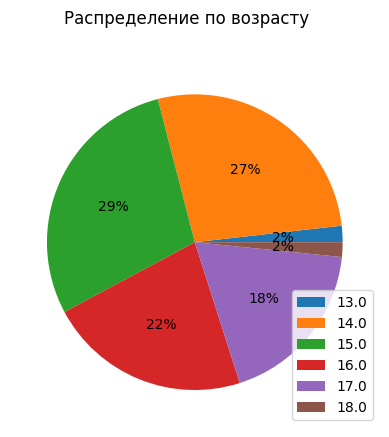

In [51]:
dem = dem[dem.Age > 12 ]
dem.groupby(['Age']).sum().plot(kind='pie', subplots=True, title='Распределение по возрасту', autopct='%1.0f%%', ylabel='', labeldistance=None)

<ipython-input-54-7564e0ed7e39>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dem1.groupby(['LeadingHand']).sum().plot(kind='pie', subplots=True, title='Распределение по ведущей руке', autopct='%1.0f%%', ylabel='', labeldistance=None, labels = [r'Правая', r'Левая',


array([<Axes: >], dtype=object)

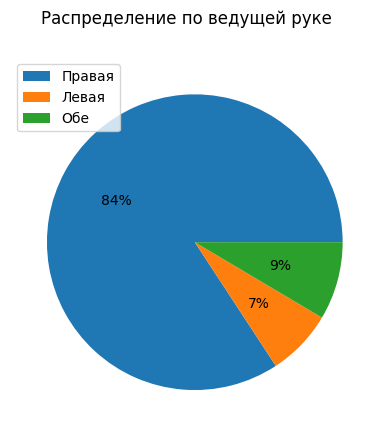

In [54]:
dem1.groupby(['LeadingHand']).sum().plot(kind='pie', subplots=True, title='Распределение по ведущей руке', autopct='%1.0f%%', ylabel='', labeldistance=None, labels = [r'Правая', r'Левая',
r'Обе'])

In [55]:
dem_8 = pd.read_csv('8 класс - демография школы test-7.csv', delimiter=',', on_bad_lines="skip", engine='python')
dem_10 = pd.read_csv('10  класс - демография школы test-7.csv', delimiter=',', on_bad_lines="skip", engine='python')
dem_11 = pd.read_csv('11 класс - демография школы test-7.csv', delimiter=',', on_bad_lines="skip", engine='python')
dem_10

,subject['id'],subject['login'],subject['alias'],subject['createdAt'],subject['updatedAt'],test[7].question['Dem-school-time'].response.value,test[7].question['Dem-school-time'].response.orderNumber,test[7].question['Dem-school-time'].firstQuestionDisplayTime,test[7].question['Dem-school-time'].lastQuestionDisplayTime,test[7].question['Dem-school-time'].firstResponseTime,...,test[7].question['Dem-future-edu'].lastQuestionDisplayTime,test[7].question['Dem-future-edu'].firstResponseTime,test[7].question['Dem-future-edu'].lastResponseTime,test[7].question['Dem-future-edu'].response.totalTime,test[7].question['Dem-future-become'].response.value,test[7].question['Dem-future-become'].firstQuestionDisplayTime,test[7].question['Dem-future-become'].lastQuestionDisplayTime,test[7].question['Dem-future-become'].firstResponseTime,test[7].question['Dem-future-become'].lastResponseTime,test[7].question['Dem-future-become'].response.totalTime
0,id,login,alias,createdAt,updatedAt,Dem-school-time,Dem-school-time.orderNumber,Dem-school-time.firstQuestionDisplayTime,Dem-school-time.lastQuestionDisplayTime,Dem-school-time.firstResponseTime,...,Dem-future-edu.lastQuestionDisplayTime,Dem-future-edu.firstResponseTime,Dem-future-edu.lastResponseTime,Dem-future-edu.totalTime,Dem-future-become,Dem-future-become.firstQuestionDisplayTime,Dem-future-become.lastQuestionDisplayTime,Dem-future-become.firstResponseTime,Dem-future-become.lastResponseTime,Dem-future-become.totalTime
1,5ded4563a178d3264f59a0b5,BOKS-003-5830883441001,BOKS-003-10-001,08.12.2019 21:48:03.450,18.02.2020 13:37:31.781,3,3,24.12.2019 09:26:25.723,24.12.2019 09:26:25.723,24.12.2019 09:26:41.966,...,24.12.2019 09:26:25.972,24.12.2019 09:28:13.255,24.12.2019 09:28:13.255,107.283,Социальным педагогом,24.12.2019 09:26:25.990,24.12.2019 09:26:25.990,24.12.2019 09:29:03.729,24.12.2019 09:29:55.682,209.692
2,5ded4563a178d3264f59a0b6,BOKS-003-5830883441002,BOKS-003-10-002,08.12.2019 21:48:03.450,18.02.2020 13:35:24.071,2,2,24.12.2019 13:56:52.179,24.12.2019 13:56:52.179,24.12.2019 13:56:56.155,...,24.12.2019 13:56:52.475,24.12.2019 13:58:21.959,24.12.2019 13:58:27.525,95.05,юристом,24.12.2019 13:56:52.490,24.12.2019 13:56:52.490,24.12.2019 13:58:43.417,24.12.2019 13:58:43.417,110.927
3,5ded4563a178d3264f59a0b7,BOKS-003-5830883441003,BOKS-003-10-003,08.12.2019 21:48:03.451,18.02.2020 13:38:15.619,2,2,24.12.2019 14:01:14.462,24.12.2019 14:01:14.462,24.12.2019 14:01:20.680,...,24.12.2019 14:01:14.727,24.12.2019 14:02:23.737,24.12.2019 14:02:23.737,69.01,"Врач,преподаватель.",24.12.2019 14:01:14.738,24.12.2019 14:01:14.738,24.12.2019 14:03:19.944,24.12.2019 14:03:19.944,125.206
4,5ded4563a178d3264f59a0b8,BOKS-003-5830883441004,BOKS-003-10-004,08.12.2019 21:48:03.451,18.02.2020 13:46:20.561,3,3,24.12.2019 09:26:36.363,24.12.2019 09:26:36.363,24.12.2019 09:26:42.697,...,24.12.2019 09:26:36.605,24.12.2019 09:28:17.687,24.12.2019 09:28:22.449,105.844,Программистом,24.12.2019 09:26:36.612,24.12.2019 09:26:36.612,24.12.2019 09:28:29.440,24.12.2019 09:28:29.440,112.828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
942,5ded45b4f59d47264e260ec6,SOSN-130-5830964448056,SOSN-130-10-056,08.12.2019 21:49:24.470,05.02.2020 09:35:08.804,3,3,05.02.2020 10:01:44.700,05.02.2020 10:01:44.700,05.02.2020 10:01:50.625,...,05.02.2020 10:01:45.365,05.02.2020 10:02:40.088,05.02.2020 10:02:40.088,54.723,Баристо,05.02.2020 10:01:45.402,05.02.2020 10:01:45.402,05.02.2020 10:03:05.189,05.02.2020 10:03:05.189,79.787
943,5ded45b4f59d47264e260ec7,SOSN-130-5830964448057,SOSN-130-10-057,08.12.2019 21:49:24.470,17.03.2020 09:45:58.231,2,2,20.01.2020 14:17:06.179,20.01.2020 14:17:06.179,20.01.2020 14:17:14.664,...,20.01.2020 14:17:06.767,20.01.2020 14:18:40.924,20.01.2020 14:18:40.924,94.157,не решил,20.01.2020 14:17:06.805,20.01.2020 14:17:06.805,20.01.2020 14:18:58.999,20.01.2020 14:18:58.999,112.194
944,5ded45b4f59d47264e260ec8,SOSN-130-5830964448058,SOSN-130-10-058,08.12.2019 21:49:24.470,

In [95]:
dem = dem_8.append(dem_10).append(dem_11)
dem.columns = dem.iloc[0]
dem = dem.drop(labels = [0],axis = 0)
dem1 = dem[['id', 'Dem-school-time', 'Dem-homework']].copy()
dem = dem[dem['Dem-school-time'].notna()]
dem = dem[['id', 'Dem-school-time', 'Dem-school-time.orderNumber']].copy()
dem

<ipython-input-95-259a6da4909a>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dem = dem_8.append(dem_10).append(dem_11)


,id,Dem-school-time,Dem-school-time.orderNumber
1,5ded4562f59d47264e25ffc2,2,2
3,5ded4562f59d47264e25ffea,2,2
4,5ded4562f59d47264e25ffeb,2,2
5,5ded4562f59d47264e25ffec,2,2
6,5ded4562f59d47264e25ffed,1,1
...,...,...,...
834,5ded45ba36cc3c265b88eb55,2,2
835,5ded45bfa178d3264f59b7cb,1,1
836,5ded45bfa178d3264f59b7cc,2,2
837,5ded45bfa178d3264f59b7cd,2,2


<ipython-input-92-340214c6bd64>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dem.groupby(['Dem-school-time']).sum().plot(kind='pie', subplots=True, title='Количество времени в школе', autopct='%1.0f%%', ylabel='', labeldistance=None, labels = [r'< половины дня', r'полдня',


array([<Axes: >], dtype=object)

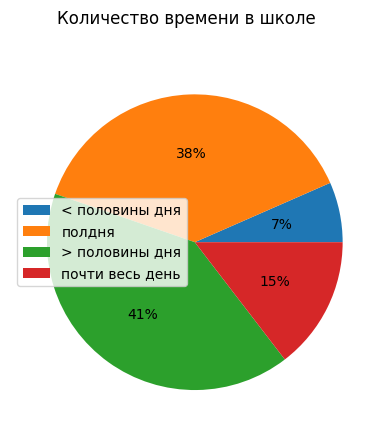

In [92]:
dem["Dem-school-time"] =  dem["Dem-school-time"].astype(int)
dem["Dem-school-time.orderNumber"] =  dem["Dem-school-time.orderNumber"].astype(int)
dem = dem[dem["Dem-school-time"] > 0]
dem.groupby(['Dem-school-time']).sum().plot(kind='pie', subplots=True, title='Количество времени в школе', autopct='%1.0f%%', ylabel='', labeldistance=None, labels = [r'< половины дня', r'полдня',
r'> половины дня', r'почти весь день'])

<ipython-input-100-18b040e87f19>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dem1.groupby(['Dem-homework']).sum().plot(kind='pie', subplots=True, title='Количество времени, уходящщее на домешнее задание', autopct='%1.0f%%', ylabel='', labeldistance=None, labels = [r'1 час', r'2 часа',


array([<Axes: >], dtype=object)

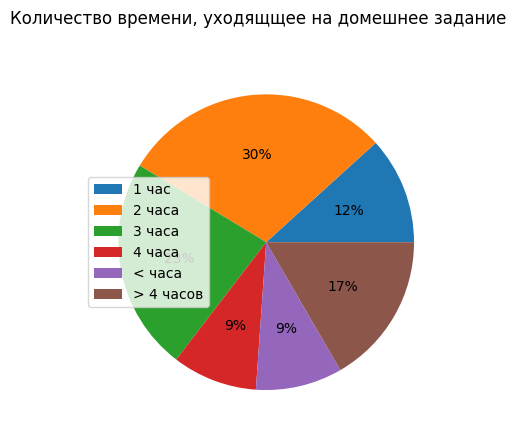

In [100]:
dem1 = dem1[dem1['Dem-homework'].notna()]
dem1["Dem-school-time"] =  dem1["Dem-school-time"].astype(int)
dem1.groupby(['Dem-homework']).sum().plot(kind='pie', subplots=True, title='Количество времени, уходящщее на домашнее задание', autopct='%1.0f%%', ylabel='', labeldistance=None, labels = [r'1 час', r'2 часа',
r'3 часа', r'4 часа', r'< часа', r'> 4 часов'])